In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels
import os

%matplotlib inline

In [85]:
# import data
df = pd.read_csv("datasets/housing/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Key Terms for Estimates of Location

**1. Mean**
* The sum of all values divided by the number of values.

**Synonym**
* Average

In [4]:
# mean
df.median_house_value.mean()

206855.81690891474

**2. Weighted mean**
* The sum of all values times a weight divided by the sum of the weights.

**Synonym**
* Weighted average

Instead of each data point contributing equally to the final mean, some data points contribute more “weight” than others.

In [5]:
# weighted mean
np.average(df.median_house_value, weights=df.housing_median_age)

212211.75684760598

**3. Trimmed mean**

* The average of all values after dropping a fixed number of extreme values.

**Synonym**

* Truncated mean

It involves the calculation of the mean after discarding given parts of a probability distribution or sample at the high and low end, and typically discarding an equal amount of both.

In [6]:
# 10% trimmed from both sides
stats.trim_mean(df.median_house_value, 0.1)

192772.9953972868

**4. Median**

* The value such that one-half of the data lies above and below.

**Synonym**

* 50th percentile

In [7]:
df.median_house_value.median()

179700.0

**Weighted median**

* The value such that one-half of the sum of the weights lies above and below the sorted data.

In [8]:
# function to calculate the weighted median
def weighted_median(df, median_var, weight_var):
    df_sorted = df.sort_values(median_var)
    cumsum = df_sorted[weight_var].cumsum()
    cutoff = df_sorted[weight_var].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_var].iloc[0]

weighted_median(df, "median_house_value", "housing_median_age")

183700.0

**5. Percentile**

* The value such that P percent of the data lies below.

**Synonym**

* Quantile

In [9]:
# getting the third quarted of the data
q3 = np.percentile(df.median_house_value, 75)
q3

264725.0

<div class="alert alert-block alert-success">
    
<br>
    
**Key Ideas:**

* The basic metric for location is the mean, but it can be sensitive to extreme values (outlier).
* Other metrics (median, trimmed mean) are less sensitive to outliers and unusual distributions and hence are more robust.
</div>

# Estimates of Variability

**1. Deviation**

* Is the difference between the observed values and the estimate of location

**Synonyms**

* Errors, residuals

**2. Variance** 

* The sum of squared deviations from the mean divided by n – 1 where n is the number of data values.

**Synonym**

* Mean-squared-error

In [10]:
# a list of numbers to use for calculations
list_1 = [1,2,13,24,25,36,37,38,99]

# Calculating variance with numpy
np.var([list_1])

764.6913580246915

**3. Standard deviation**

* The square root of the variance.

In [11]:

# square root of the variance
print(np.sqrt(np.var([list_1])))

# calculatind SD with numpy
print(np.std(list_1))

27.653053321915312
27.653053321915312


**4. Mean absolute deviation**

* The mean of the absolute values of the deviations from the mean.

**Synonyms**

* l1-norm, Manhattan norm

In [12]:
def mean_abs_dev(our_list):
    m = np.mean(our_list)  # mean
    dev = [] # add the absolute value of (x - mean)
    
    for i in our_list:
        dev.append(abs(abs(i) - m))
        
    return np.sum(dev) / len(dev)

mean_abs_dev(list_1)

19.50617283950617

In [15]:
# or
np.mean(np.absolute(list_1 - np.mean(list_1)))

19.50617283950617

Neither the `variance`, the `standard deviation`, nor the `mean absolute deviation` is robust to outliers and extreme values. 
The `variance` and `standard deviation` are especially sensitive to outliers since they are based on the squared deviations

**5. Median absolute deviation from the median**

* The median of the absolute values of the deviations from the median.

A robust estimate of variability.

In [16]:
from statsmodels import robust
robust.scale.mad(list_1)

17.791226622067224

In [17]:
# or (but needs to be scaled) need to ask
np.median(np.absolute(list_1 - np.median(list_1))) 

12.0

In [18]:
def median_abs_dev(lst):
    m = np.median(lst)
    result = []
    
    for i in lst:
        result.append(abs(i - m))
        
    return np.median(result) * 1.4826

median_abs_dev(list_1)

17.7912

In [19]:
scipy.stats.median_abs_deviation(list_1) * 1.4826

17.7912

**6. Range:**
* Difference between the largest and smallest values in the dataset

**7. Order Statistics:**
* Metrics based on the data values sorted from smallest to biggest (Ranks)

**8. Percentile:**
* The value which is greater than P percent of the values in the dataset (e.g. if you score 75 points on a test, and are ranked in the 85 th percentile, it means that the score 75 is higher than 85% of the scores.)

**9. Interquartile Range:**
* The difference between the 75th and 25th persentile (IQR)

In [20]:
# IQR
q3, q1 = np.percentile(list_1, [75, 25])
iqr = q3 - q1
iqr

24.0

<div class="alert alert-block alert-success">
    
<br>
    
**Key Ideas:**

* Variance and standard deviation are the most widespread and routinely reported statistics of variability (`both are sensitive to outliers`).
* More robust metrics include mean absolute deviation, median absolute deviation from the median, and percentiles (quantiles).
</div>

# Exploring the Data Distribution

**1. Boxplot**
* Quick way to visualize the distribution of data

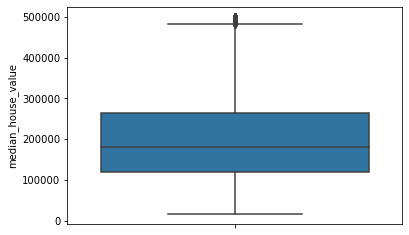

In [46]:
sns.boxplot(y = df.median_house_value);

**2. Frequency Table**
* A tally of the count of numeric data values that fall into a set of intervals (bins)

In [45]:
frequency_table = df.copy()
frequency_table["freq"] = pd.cut(df.median_house_value, 10)
frequency_table.groupby("freq")["median_house_value"].count().reset_index()

,freq,median_house_value
0,"(14513.998, 63499.2]",877
1,"(63499.2, 111999.4]",3612
2,"(111999.4, 160499.6]",4099
3,"(160499.6, 208999.8]",3771
4,"(208999.8, 257500.0]",2804
5,"(257500.0, 306000.2]",1764
6,"(306000.2, 354500.4]",1239
7,"(354500.4, 403000.6]",752
8,"(403000.6, 451500.8]",479
9,"(451500.8, 500001.0]",1243


**Histogram**
* A plot of the frequency table

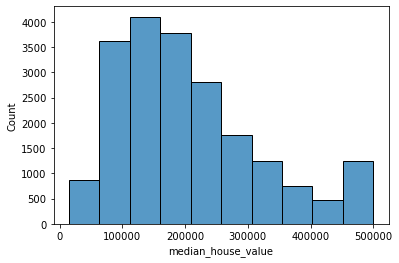

In [48]:
sns.histplot(x = df.median_house_value, bins=10);

**Density Plot**
* Shows the distribution of the values as continuous line

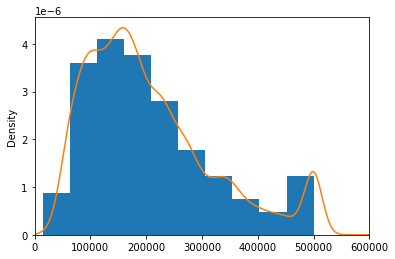

In [59]:
ax = df.median_house_value.plot.hist(density = True, xlim = [0, 600000])
df.median_house_value.plot.density(ax=ax);

# Exploring Binary and Categorical Data

**Mode**
* The most commonly accurring category or value in a data set

In [60]:
df.median_house_value.mode()

0    500001.0
dtype: float64

**Expected Value** --------------------------
* Sum of each value multiplied by the probability of accurrance (what you expect to to have)

**---------------------------------------------> look into it**

In [61]:
scipy.stats.describe(df.median_house_value).mean

206855.81690891474

**Bar Charts**
* Frequency or proportion for each category.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


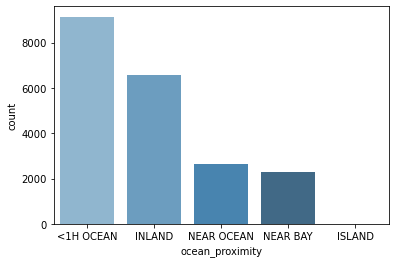

In [68]:
# value counts
print(df.ocean_proximity.value_counts())

# bar plot of the value counts
sns.countplot(x = df.ocean_proximity, 
              palette="Blues_d",
              order = df.ocean_proximity.value_counts().index);

**Pie Chart**
* The frequency or proportion for each category plotted as wedges in a pie

Not the best way to present the data. But possible

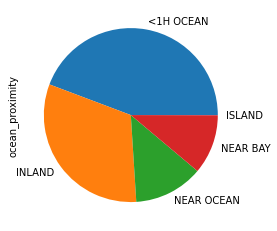

In [70]:
df.ocean_proximity.value_counts().plot.pie();

# Correlation

**Correlation coefficient**
* A metric trat measures the extent to which numeric variables are associated with one another (ranges from -1 to 1)

In [74]:
# pick 4 features/variables
picked = df[["total_rooms", "total_bedrooms", 
            "households", "median_house_value"]]

picked.corr()

,total_rooms,total_bedrooms,households,median_house_value
total_rooms,1.000000,0.930380,0.918484,0.134153
total_bedrooms,0.930380,1.000000,0.979728,0.049686
households,0.918484,0.979728,1.000000,0.065843
median_house_value,0.134153,0.049686,0.065843,1.000000


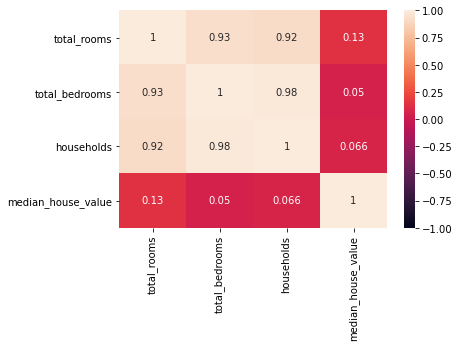

In [75]:
# plot a correlation heatmap
sns.heatmap(picked.corr(), vmin = -1, vmax = 1, annot = True);

**Scatter plot**
* A plot in which the x-axis is the value of one variable, and the y-axis the value of another

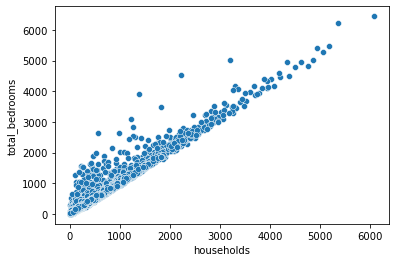

In [81]:
sns.scatterplot(data = df, x = "households", 
                y = "total_bedrooms");

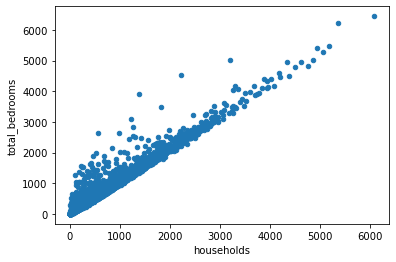

In [82]:
# or
df.plot.scatter(x = "households", y = "total_bedrooms");

# Exploring two or more variables

**Contingency tables**
* A tally of counts between two or more categorical variables

In [88]:
# create a dataframe (https://www.geeksforgeeks.org/python-pandas-pivot_table/)
df_made = pd.DataFrame({'A': ['John', 'Boby', 'Mina', 'Peter', 'Nicky'],
      'B': ['Masters', 'Graduate', 'Graduate', 'Masters', 'Graduate'],
      'C': [27, 23, 21, 23, 24]})
   
df_made

,A,B,C
0,John,Masters,27
1,Boby,Graduate,23
2,Mina,Graduate,21
3,Peter,Masters,23
4,Nicky,Graduate,24


In [90]:
cont_table = pd.pivot_table(df_made, values="A", index=["B", "C"],
                            columns=["B"], aggfunc = np.sum)

cont_table

B           Graduate Masters
B        C                  
Graduate 21     Mina     NaN
         23     Boby     NaN
         24    Nicky     NaN
Masters  23      NaN   Peter
         27      NaN    John

**Hexagonal binning**
* Plot of two numeric variables (if there are a lot of values sometimes it's better to use it over a scatter plot)

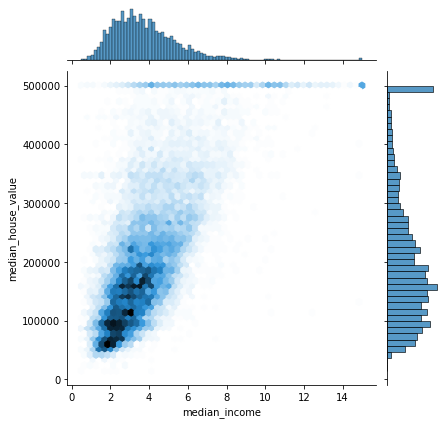

In [100]:
sns.jointplot(data = df, x = "median_income", y = "median_house_value",
              kind = "hex");

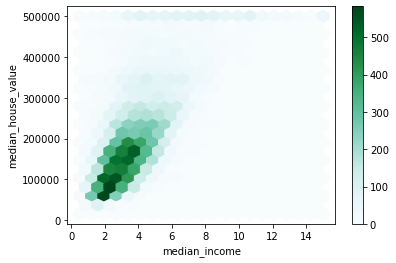

In [99]:
# or
df.plot.hexbin(x = "median_income", y = "median_house_value",
               gridsize=20, sharex=False);

**Contour plot**
* A plot showing the density of two numreic variables like a topograhical map

Contour plots are overlaid onto scatterplots and offer a layer of lines that help determine where data is the most dense

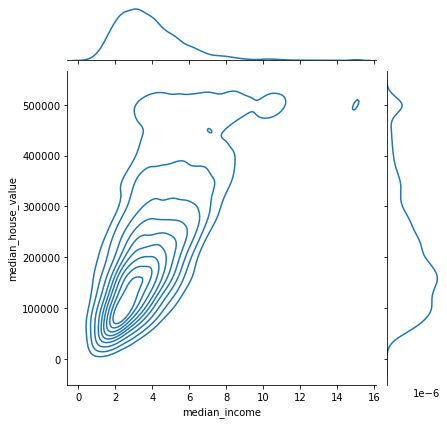

In [105]:
sns.jointplot(data = df, x = "median_income", 
             y = "median_house_value", kind = "kde");

**Violin plot**
* Similar to boxplot but showing the density estimate

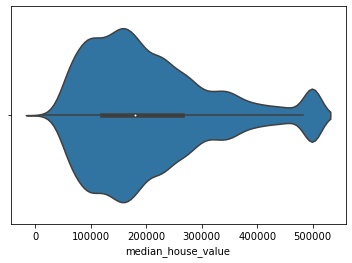

In [111]:
sns.violinplot(data = df, x = "median_house_value");

# Categorical and numeric data

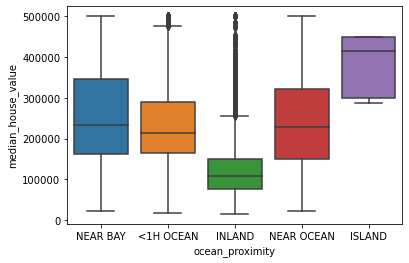

In [114]:
# box plot
sns.boxplot(data = df, x = "ocean_proximity", 
             y = "median_house_value");

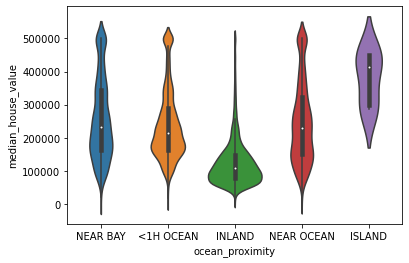

In [115]:
# violin plot
sns.violinplot(data = df, x = "ocean_proximity", 
             y = "median_house_value");